In [26]:
import pandas as pd

df = pd.read_csv('../data/cleaned_data.csv')

df.head()

,Respondent ID,Age group,Gender,Category,Marital status,Deciding factors to buy car,Likelihood of customised vehicle if FOC,Exterior components to customise,Interior components to customise,Customisation Budget,Interest in personalising car,Personalisation Budget,Any cadding experience,Singaporean design idea feedback
0,3692d111-b5ca-47cb-9266-9886a1c2202a,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",NaN
1,bf2da5c6-19f4-4a9b-aef6-bf8203c1f387,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Likely,Wheels;Grilles;Headlights;Side mirrors,Centre compartment,under 500,Only with professional help,under 500,"No, I would need a designer to model my sketch",wheels that look like the singapore flyer
2,ec1510d8-329f-48a4-be17-a1c87b51b5ed,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Aesthetics;Functionality;Customisable options,Very likely,Wheels;Grilles;Headlights;Side mirrors,Steering wheel;Dashboard,500-1000,Yes,500-1000,"Yes, I can design on my own",NaN
3,9e1f5674-6e87-47df-9c5e-c0b6c6005108,20-30,Female,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels;Grilles;Headlights;Side mirrors;Bumpers,Steering wheel;Centre compartment;Door handles...,under 500,Yes,under 500,"No, I would need a designer to model my sketch",NaN
4,55633410-16cf-43eb-85cf-1bac1fb966f7,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Brand name;Aesthetics;Technological feat...,Very likely,Wheels;Grilles;Headlights;Bumpers,Steering wheel;Centre compartment,over 1000,Only with professional help,over 1000,"No, I would need a designer to model my sketch",Sg flag/ colour related car paint


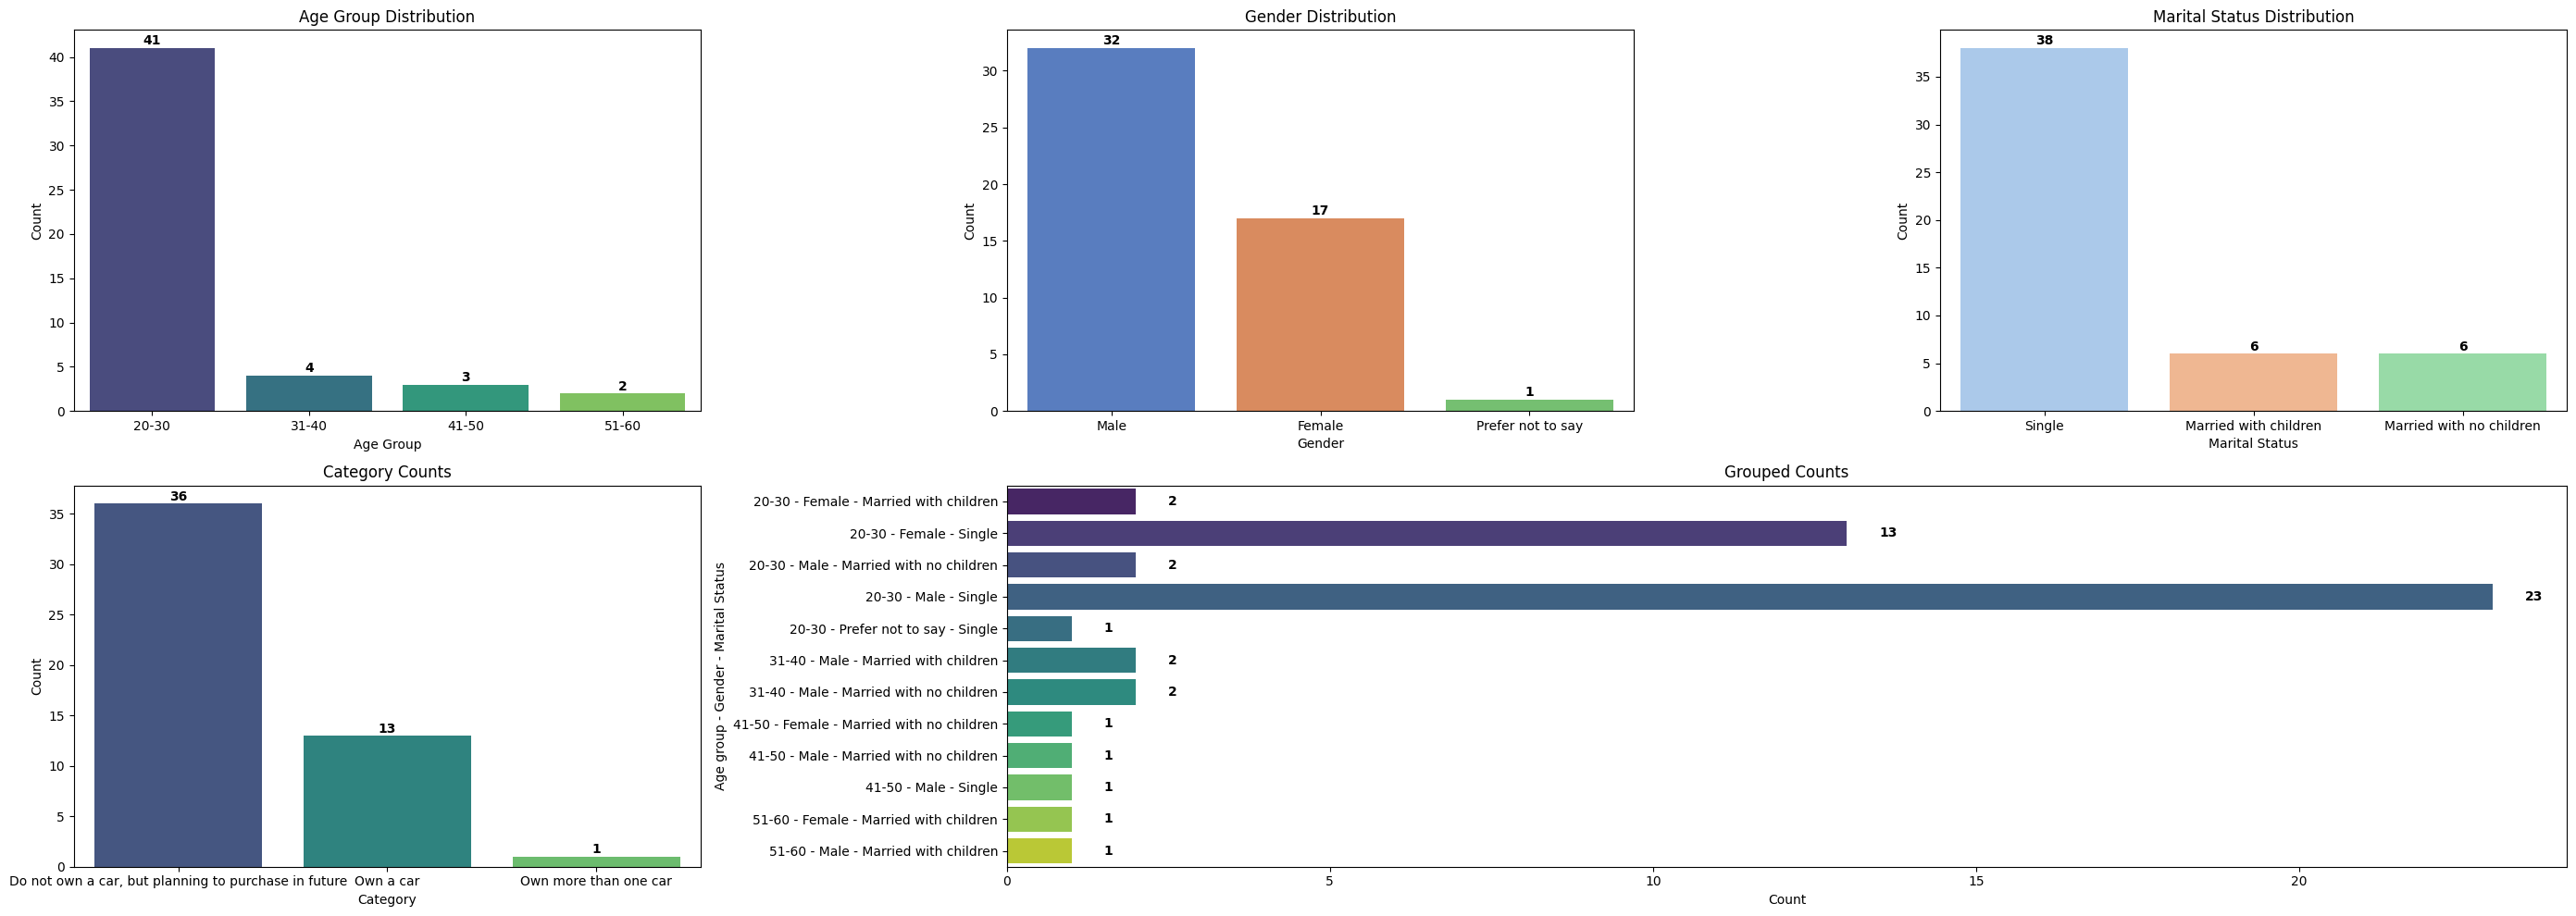

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib import gridspec

warnings.filterwarnings('ignore')


age_group_counts = df['Age group'].value_counts()
gender_counts = df['Gender'].value_counts()
marital_status_counts = df['Marital status'].value_counts()
category_counts = df['Category'].value_counts()

fig = plt.figure(figsize=(28, 10))  

gs = gridspec.GridSpec(2, 3)  # nrows, ncols

ax1 = plt.subplot(gs[0, 0])  # First subplot in the first row
ax2 = plt.subplot(gs[0, 1])  # Second subplot in the first row
ax3 = plt.subplot(gs[0, 2])  # Third subplot in the first row
ax4 = plt.subplot(gs[1, 0])  # The first subplot in the second row
ax5 = plt.subplot(gs[1, 1:])  # The last subplot spans across all columns in the second row

# Age Group Distribution
sns.barplot(x=age_group_counts.index, y=age_group_counts, palette='viridis', ax=ax1)
ax1.set_title('Age Group Distribution')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
for i, count in enumerate(age_group_counts):
    ax1.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gender Distribution
sns.barplot(x=gender_counts.index, y=gender_counts, palette='muted', ax=ax2)
ax2.set_title('Gender Distribution')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')
for i, count in enumerate(gender_counts):
    ax2.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Marital Status Distribution
sns.barplot(x=marital_status_counts.index, y=marital_status_counts, palette='pastel', ax=ax3)
ax3.set_title('Marital Status Distribution')
ax3.set_xlabel('Marital Status')
ax3.set_ylabel('Count')
for i, count in enumerate(marital_status_counts):
    ax3.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')


# Category Counts
sns.barplot(x=category_counts.index, y=category_counts, palette='viridis', ax=ax4)
ax4.set_title('Category Counts')
ax4.set_xlabel('Category')
ax4.set_ylabel('Count')
for i, count in enumerate(category_counts):
    ax4.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Grouped Counts
grouped_counts = df.groupby(['Age group', 'Gender', 'Marital status']).size().reset_index(name='Count')
sns.barplot(x='Count', y=grouped_counts['Age group'] + ' - ' + grouped_counts['Gender'] + ' - ' + grouped_counts['Marital status'],
            data=grouped_counts, palette='viridis', ax=ax5)
ax5.set_title('Grouped Counts')
ax5.set_xlabel('Count')
ax5.set_ylabel('Age group - Gender - Marital Status')
for index, row in grouped_counts.iterrows():
    ax5.text(row['Count']+0.5, index, row['Count'], color='black', ha="left", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

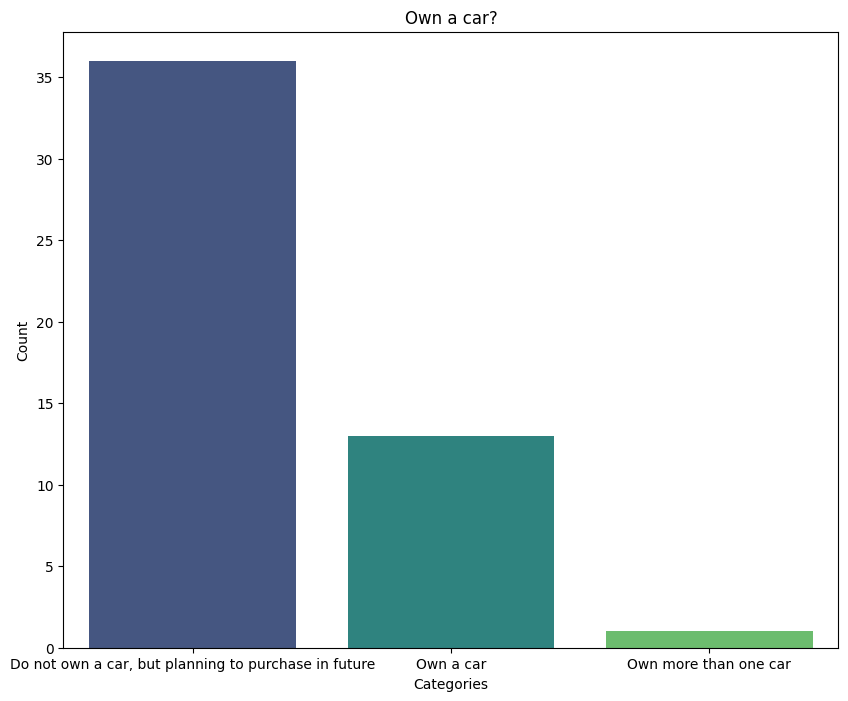

In [52]:
category_count = df['Category'].value_counts()

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the bar plots for 'Age Group', 'Gender', and 'Marital Status'
sns.barplot(x=category_count.index, y=category_count, palette='viridis', ax=ax, label='Category')

ax.set_title('Own a car?')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
